In [2]:
!pip install xarray netcdf4 matplotlib cartopy

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/3d/2c/3d1f7c1d4287dab5bc997fed8e58bad9fc9aa9c39a692bbf1aab6b1feb19/netCDF4-1.6.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cftime-1.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Using cached netCDF4-1.6.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.4 MB)


In [3]:
!pip install JSAnimation

  Using cached JSAnimation-0.1.tar.gz (8.9 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11407 sha256=7ca2ed980577755ca1c9de173bc7e7f796b88bf0d39d948cf067b97307c4f610
  Stored in directory: /home/jguo/.cache/pip/wheels/1e/16/64/028f540fe8f5eae5026a423bfd88356248074379b79f27b646
Successfully built JSAnimation


In [4]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [5]:
directory = "/home/jguo/projects/cesm/archive/case/lnd/hist/"
filename = "i.e21.I2000Clm50SpGs.f09_g17.keerZemail.002.clm2.h2.2000-12-14-00000.nc"
# Construct the full path by joining the directory and filename
nc_path = os.path.join(directory, filename)


In [6]:
# Load the NetCDF file into an xarray Dataset
ds = xr.open_dataset(nc_path)

# Extract the variable "TG"
tg = ds['TG']

In [7]:
ds['mcdate']

<xarray.DataArray 'mcdate' (time: 24)>
[24 values with dtype=int32]
Coordinates:
  * time     (time) object 2000-12-14 00:00:00 ... 2000-12-14 23:00:00.878906
Attributes:
    long_name:  current date (YYYYMMDD)

In [24]:
# Calculate the global minimum and maximum values across all time steps
vmin = tg.min()
vmax = tg.max()

In [25]:
ds

<xarray.Dataset>
Dimensions:       (levgrnd: 25, levlak: 10, levdcmp: 1, time: 24,
                   hist_interval: 2, lon: 288, lat: 192)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 1.0
  * time          (time) object 2000-12-14 00:00:00 ... 2000-12-14 23:00:00.8...
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lat           (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: hist_interval
Data variables: (12/15)
    mcdate        (time) int32 ...
    mcsec         (time) int32 ...
    mdcur         (time) int32 ...
    mscur         (time) int32 ...
    nstep         (time) int32 ...
    time_bounds   (time, hist_interval) object ...
    ...            ...
    landfrac      (lat, lon) float32 ...
    landmask      (lat, lon) float64 ...
    pftmask       (lat, lon) float64 ...
    nbedrock      (lat, lon) float64 ...
    RH            (time, lat, lon) float32 ...
    TG            (time, lat, lon) float32 244.9 244.9 244.9 ... nan nan nan
Attributes: (12/40)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 10/10/23 02:06:51
    source:                                    Community Terrestrial Systems ...
    hostname:                                  JohnnyThinkStation
    ...                                        ...
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          hour_1
    Time_constant_3Dvars_filename:             ./i.e21.I2000Clm50SpGs.f09_g17...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...

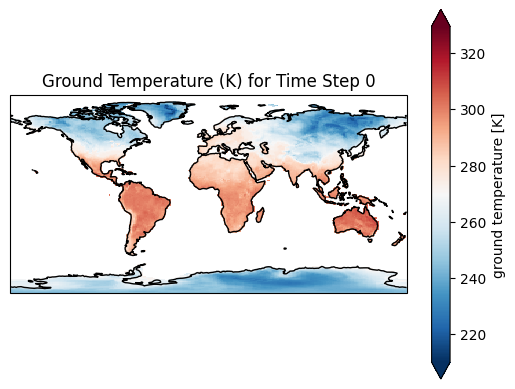

In [26]:
# ------------ Display a single map chart for the first time step ------------ #
fig1, ax1 = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
tg.isel(time=0).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='RdBu_r', extend='both', vmin=vmin, vmax=vmax)
ax1.coastlines()  # add coastlines
ax1.set_title("Ground Temperature (K) for Time Step 0")
plt.show()

# Close the first figure to free up memory and plotting space
plt.close(fig1)

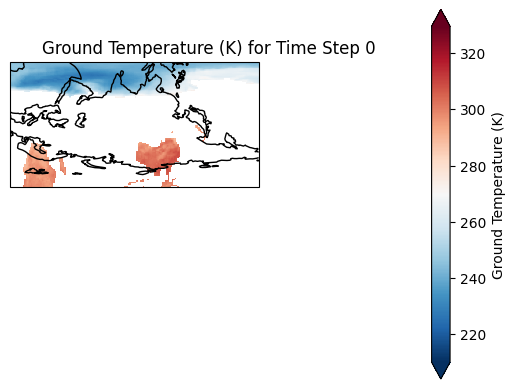

In [27]:
# Set up the figure for the animation
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()  # add coastlines

# Initialize with an empty image for the colorbar reference
im = ax.imshow(np.zeros_like(tg.isel(time=0).values), transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=vmin, vmax=vmax, origin='upper')

# Add the colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', extend='both')
cbar.set_label('Ground Temperature (K)')

def update(num):
    ax.set_title(f"Ground Temperature (K) for Time Step {num}")
    im.set_data(tg.isel(time=num).values)

# Create an animation by repeatedly calling the update function
ani = FuncAnimation(fig, update, frames=24, repeat=False)

# Display the animation in the notebook
HTML(ani.to_jshtml())